In [0]:
#set the tesorflow version to 2 and import packages
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(tf.__version__)

2.2.0-rc4


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip "/content/gdrive/My Drive/data.h5.zip" -d "./"

Archive:  /content/gdrive/My Drive/data.h5.zip
replace ./data1.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data1.h5              


In [0]:
!ls

data1.h5  gdrive  sample_data


In [0]:
import numpy as np
import h5py
def loadDataH5():
  with h5py.File('data1.h5','r') as hf:
    trainX = np.array(hf.get('trainX'))
    trainY = np.array(hf.get('trainY'))
    valX = np.array(hf.get('valX'))
    valY = np.array(hf.get('valY'))
    print (trainX.shape,trainY.shape)
    print (valX.shape,valY.shape)
  return trainX, trainY, valX, valY
trainX, trainY, testX, testY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [0]:
#computing height, width, depth of images and number of classes in the data
height = trainX.shape[1]
width = trainX.shape[2]
depth = trainX.shape[3]
classes = np_utils.to_categorical(trainY).shape[1]
print(classes)
print(height, width,depth)

17
128 128 3


In [0]:
#model1
model1 = tf.keras.Sequential(name = "model1")
inputShape = (height, width, depth)
model1.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(512,activation='relu'))
model1.add(keras.layers.Dense(classes, activation='softmax'))
model1.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model1_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history1 = model1.fit(trainX, trainY, batch_size=16,epochs=20, validation_data =(testX, testY),callbacks=[checkpoint] )


Epoch 1/20
62/64 [============================>.] - ETA: 0s - loss: 2.5531 - accuracy: 0.1653
Epoch 00001: val_loss improved from inf to 2.12469, saving model to /content/gdrive/My Drive/Deep Learning Model/model1_weights.01-2.12.hdf5
64/64 [==============================] - 4s 67ms/step - loss: 2.5415 - accuracy: 0.1706 - val_loss: 2.1247 - val_accuracy: 0.2735
Epoch 2/20
63/64 [============================>.] - ETA: 0s - loss: 1.9746 - accuracy: 0.3353
Epoch 00002: val_loss improved from 2.12469 to 1.83061, saving model to /content/gdrive/My Drive/Deep Learning Model/model1_weights.02-1.83.hdf5
64/64 [==============================] - 4s 59ms/step - loss: 1.9710 - accuracy: 0.3392 - val_loss: 1.8306 - val_accuracy: 0.4176
Epoch 3/20
62/64 [============================>.] - ETA: 0s - loss: 1.6547 - accuracy: 0.4456
Epoch 00003: val_loss improved from 1.83061 to 1.73016, saving model to /content/gdrive/My Drive/Deep Learning Model/model1_weights.03-1.73.hdf5
64/64 [====================

In [0]:
model1 = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model1_weights.07-1.41.hdf5')
model1.evaluate(testX, testY)

11/11 [==============================] - 0s 17ms/step - loss: 1.4073 - accuracy: 0.5412


[1.407301425933838, 0.5411764979362488]

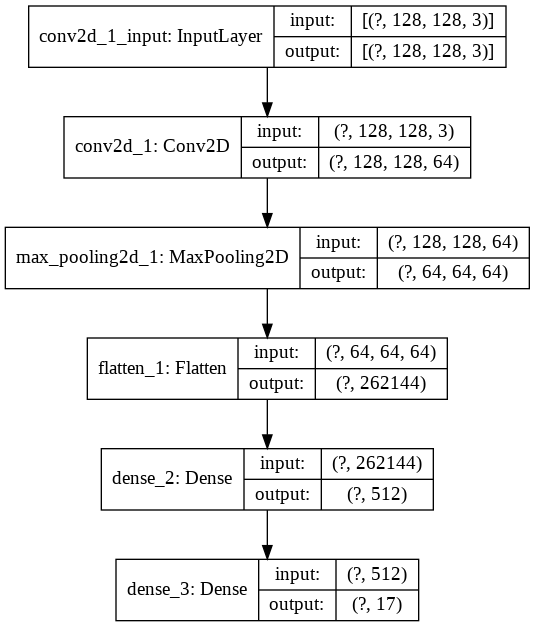

In [0]:
keras.utils.plot_model(model1, to_file ="/content/gdrive/My Drive/Deep Learning Model/model1.png", show_shapes=True)

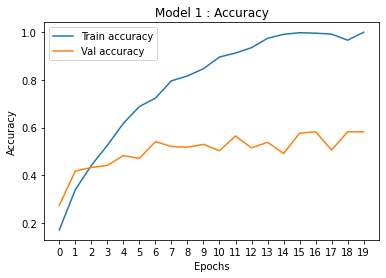

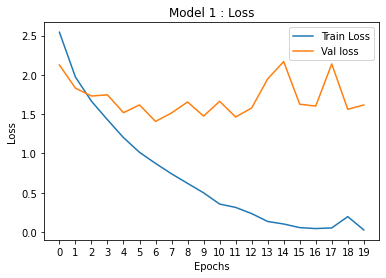

In [0]:
#plot the perfomance of model 1
dictionary1 = history1.history
train_loss = dictionary1['loss']
val_loss = dictionary1['val_loss']
train_accuracy = dictionary1['accuracy']
val_accuracy = dictionary1['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 1 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 1 : Loss')
plt.legend()
plt.show()

In [0]:
#model2
model2 = tf.keras.Sequential(name = "model2")
inputShape = (height, width, depth)
model2.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", activation='relu'))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(512,activation='relu'))
model2.add(keras.layers.Dense(classes, activation='softmax'))
model2.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model2_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history2 = model2.fit(trainX, trainY, batch_size=16,epochs=20, validation_data =(testX, testY) ,callbacks = [checkpoint])


Epoch 1/20
64/64 [==============================] - ETA: 0s - loss: 2.7096 - accuracy: 0.1451
Epoch 00001: val_loss improved from inf to 2.45226, saving model to /content/gdrive/My Drive/Deep Learning Model/model2_weights.01-2.45.hdf5
64/64 [==============================] - 2s 32ms/step - loss: 2.7096 - accuracy: 0.1451 - val_loss: 2.4523 - val_accuracy: 0.2059
Epoch 2/20
63/64 [============================>.] - ETA: 0s - loss: 2.1989 - accuracy: 0.2837
Epoch 00002: val_loss improved from 2.45226 to 2.02149, saving model to /content/gdrive/My Drive/Deep Learning Model/model2_weights.02-2.02.hdf5
64/64 [==============================] - 2s 27ms/step - loss: 2.1965 - accuracy: 0.2833 - val_loss: 2.0215 - val_accuracy: 0.2735
Epoch 3/20
62/64 [============================>.] - ETA: 0s - loss: 1.8401 - accuracy: 0.3518
Epoch 00003: val_loss improved from 2.02149 to 1.80872, saving model to /content/gdrive/My Drive/Deep Learning Model/model2_weights.03-1.81.hdf5
64/64 [====================

In [0]:
model2 = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model2_weights.11-1.29.hdf5')
model2.evaluate(testX, testY)

11/11 [==============================] - 0s 17ms/step - loss: 1.2931 - accuracy: 0.5853


[1.2930529117584229, 0.5852941274642944]

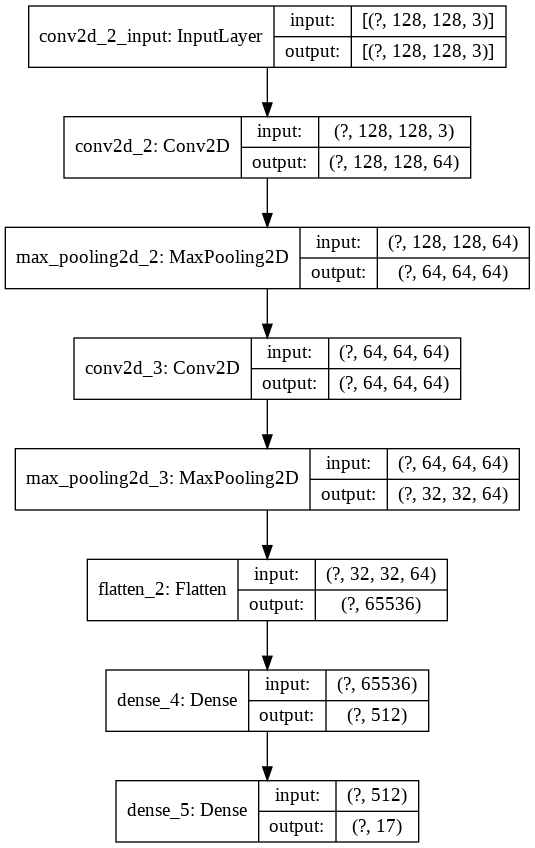

In [0]:
keras.utils.plot_model(model2, "/content/gdrive/My Drive/Deep Learning Model/model2.png", show_shapes=True)

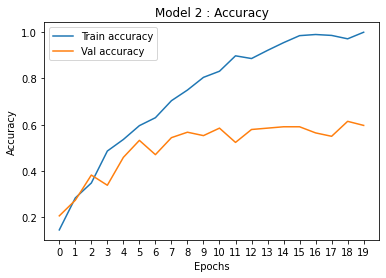

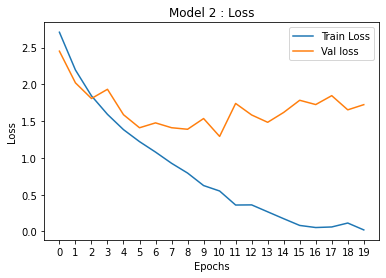

In [0]:
#plot the perfomance of model 2
dictionary2 = history2.history
train_loss = dictionary2['loss']
val_loss = dictionary2['val_loss']
train_accuracy = dictionary2['accuracy']
val_accuracy = dictionary2['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 2 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 2 : Loss')
plt.legend()
plt.show()

In [0]:
#model3
model3 = tf.keras.Sequential(name = "model3")
inputShape = (height, width, depth)
model3.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", activation='relu'))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(512,activation='relu'))
model3.add(keras.layers.Dense(classes, activation='softmax'))
model3.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model3_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history3 = model3.fit(trainX, trainY, batch_size=16,epochs=20, validation_data =(testX, testY) , callbacks = [checkpoint])


Epoch 1/20
64/64 [==============================] - ETA: 0s - loss: 2.8025 - accuracy: 0.1167
Epoch 00001: val_loss improved from inf to 2.74847, saving model to /content/gdrive/My Drive/Deep Learning Model/model3_weights.01-2.75.hdf5
64/64 [==============================] - 1s 22ms/step - loss: 2.8025 - accuracy: 0.1167 - val_loss: 2.7485 - val_accuracy: 0.1500
Epoch 2/20
61/64 [===========================>..] - ETA: 0s - loss: 2.5191 - accuracy: 0.1916
Epoch 00002: val_loss improved from 2.74847 to 2.29318, saving model to /content/gdrive/My Drive/Deep Learning Model/model3_weights.02-2.29.hdf5
64/64 [==============================] - 1s 19ms/step - loss: 2.5174 - accuracy: 0.1931 - val_loss: 2.2932 - val_accuracy: 0.1912
Epoch 3/20
61/64 [===========================>..] - ETA: 0s - loss: 2.1340 - accuracy: 0.2736
Epoch 00003: val_loss improved from 2.29318 to 2.05870, saving model to /content/gdrive/My Drive/Deep Learning Model/model3_weights.03-2.06.hdf5
64/64 [====================

In [0]:
model3 = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model3_weights.15-1.47.hdf5')
model3.evaluate(testX, testY)

11/11 [==============================] - 0s 15ms/step - loss: 1.4726 - accuracy: 0.5706


[1.472648024559021, 0.570588231086731]

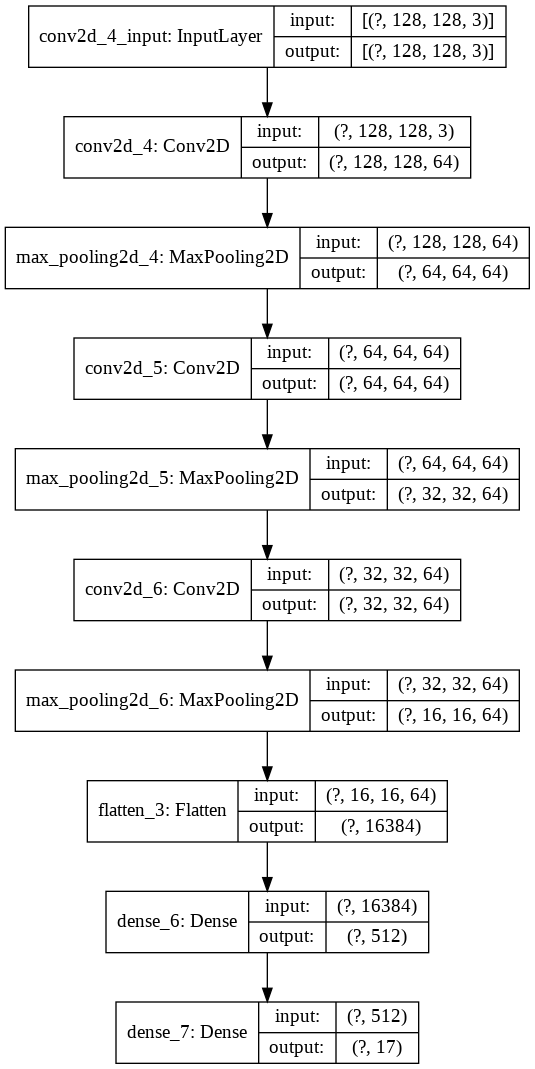

In [0]:
keras.utils.plot_model(model3, "/content/gdrive/My Drive/Deep Learning Model/model3.png", show_shapes=True)

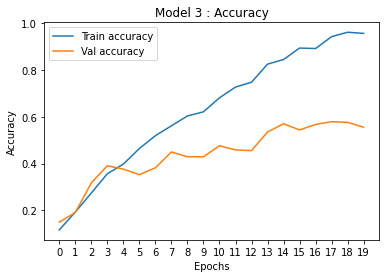

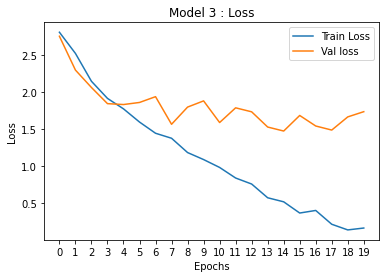

In [0]:
#plot the perfomance of model 3
dictionary3 = history3.history
train_loss = dictionary3['loss']
val_loss = dictionary3['val_loss']
train_accuracy = dictionary3['accuracy']
val_accuracy = dictionary3['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 3 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 3 : Loss')
plt.legend()
plt.show()

In [0]:
#model4
model4 = tf.keras.Sequential(name = "model4")
inputShape = (height, width, depth)
model4.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(512,activation='relu'))
model4.add(keras.layers.Dense(classes, activation='softmax'))
model4.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model4_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history4 = model4.fit(trainX, trainY, batch_size=16,epochs=20, validation_data =(testX, testY), callbacks = [checkpoint] )


Epoch 1/20
64/64 [==============================] - ETA: 0s - loss: 2.8286 - accuracy: 0.0696
Epoch 00001: val_loss improved from inf to 2.81578, saving model to /content/gdrive/My Drive/Deep Learning Model/model4_weights.01-2.82.hdf5
64/64 [==============================] - 1s 19ms/step - loss: 2.8286 - accuracy: 0.0696 - val_loss: 2.8158 - val_accuracy: 0.0912
Epoch 2/20
61/64 [===========================>..] - ETA: 0s - loss: 2.7836 - accuracy: 0.1291
Epoch 00002: val_loss improved from 2.81578 to 2.72060, saving model to /content/gdrive/My Drive/Deep Learning Model/model4_weights.02-2.72.hdf5
64/64 [==============================] - 1s 17ms/step - loss: 2.7823 - accuracy: 0.1255 - val_loss: 2.7206 - val_accuracy: 0.1735
Epoch 3/20
61/64 [===========================>..] - ETA: 0s - loss: 2.5383 - accuracy: 0.1783
Epoch 00003: val_loss improved from 2.72060 to 2.25986, saving model to /content/gdrive/My Drive/Deep Learning Model/model4_weights.03-2.26.hdf5
64/64 [====================

In [0]:
model4 = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model4_weights.16-1.44.hdf5')
model4.evaluate(testX, testY)

11/11 [==============================] - 0s 14ms/step - loss: 1.4412 - accuracy: 0.5294


[1.4412201642990112, 0.529411792755127]

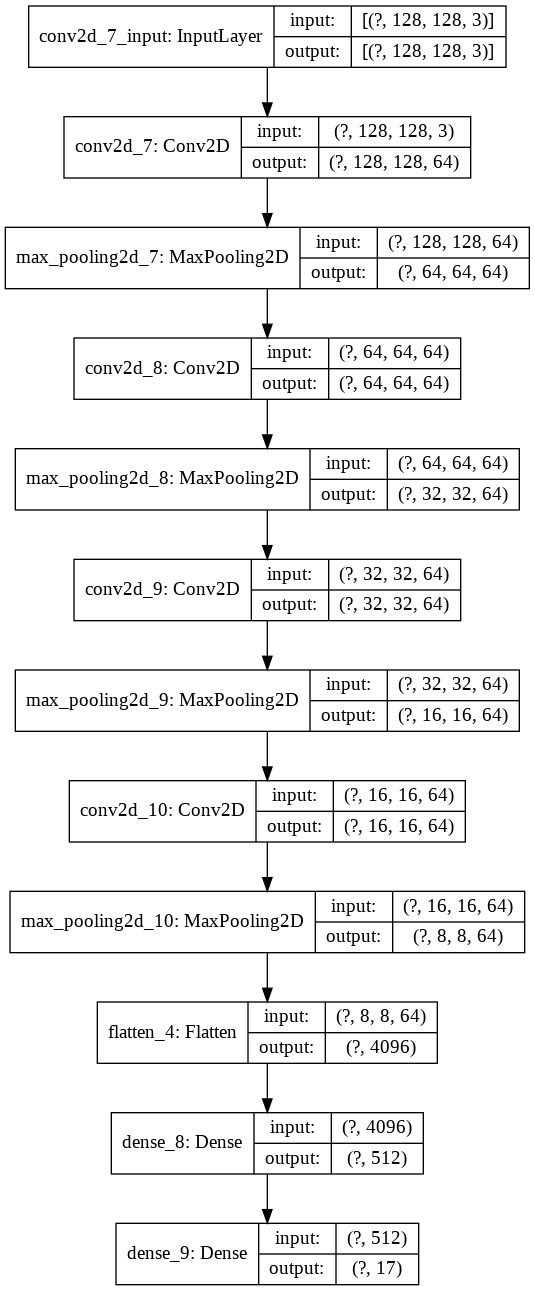

In [0]:
keras.utils.plot_model(model4, "/content/gdrive/My Drive/Deep Learning Model/model4.png", show_shapes=True)

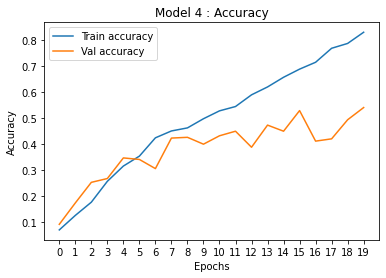

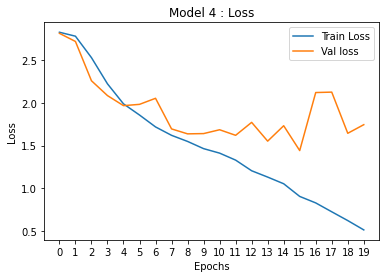

In [0]:
#plot the perfomance of model 4
dictionary4 = history4.history
train_loss = dictionary4['loss']
val_loss = dictionary4['val_loss']
train_accuracy = dictionary4['accuracy']
val_accuracy = dictionary4['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4 : Loss')
plt.legend()
plt.show()

In [0]:
#model5
model5 = tf.keras.Sequential(name = "model5")
inputShape = (height, width, depth)
model5.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model5.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(512,activation='relu'))
model5.add(keras.layers.Dense(classes, activation='softmax'))
model5.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model5_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history5 = model5.fit(trainX, trainY, batch_size=16,epochs=20, validation_data =(testX, testY),callbacks = [checkpoint] )


Epoch 1/20
63/64 [============================>.] - ETA: 0s - loss: 2.8299 - accuracy: 0.0655
Epoch 00001: val_loss improved from inf to 2.82837, saving model to /content/gdrive/My Drive/Deep Learning Model/model5_weights.01-2.83.hdf5
64/64 [==============================] - 1s 19ms/step - loss: 2.8297 - accuracy: 0.0647 - val_loss: 2.8284 - val_accuracy: 0.0529
Epoch 2/20
61/64 [===========================>..] - ETA: 0s - loss: 2.8212 - accuracy: 0.0881
Epoch 00002: val_loss improved from 2.82837 to 2.81809, saving model to /content/gdrive/My Drive/Deep Learning Model/model5_weights.02-2.82.hdf5
64/64 [==============================] - 1s 16ms/step - loss: 2.8211 - accuracy: 0.0873 - val_loss: 2.8181 - val_accuracy: 0.0500
Epoch 3/20
61/64 [===========================>..] - ETA: 0s - loss: 2.8062 - accuracy: 0.0861
Epoch 00003: val_loss improved from 2.81809 to 2.79403, saving model to /content/gdrive/My Drive/Deep Learning Model/model5_weights.03-2.79.hdf5
64/64 [====================

In [0]:
model5 = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model5_weights.14-1.55.hdf5')
model5.evaluate(testX, testY)

11/11 [==============================] - 0s 13ms/step - loss: 1.5485 - accuracy: 0.4735


[1.5484846830368042, 0.4735293984413147]

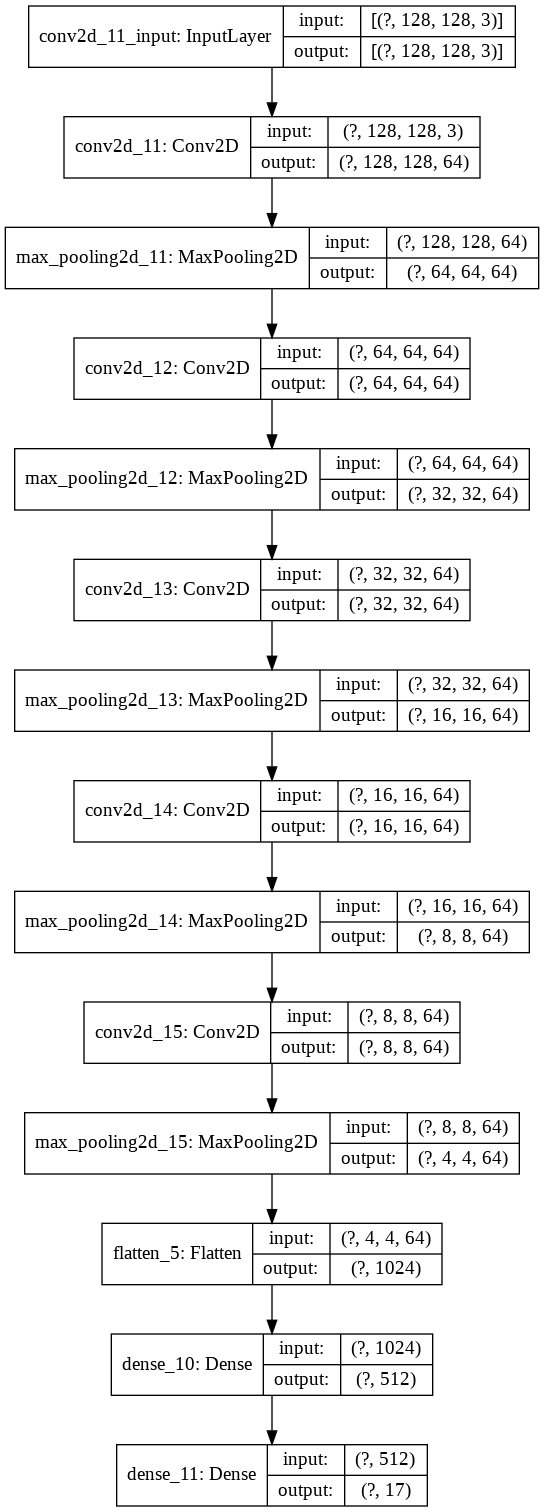

In [0]:
keras.utils.plot_model(model5, "/content/gdrive/My Drive/Deep Learning Model/model5.png", show_shapes=True)

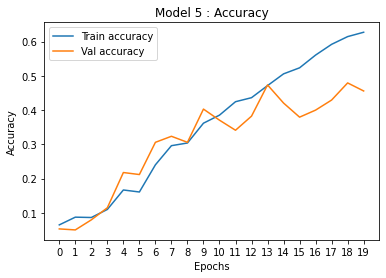

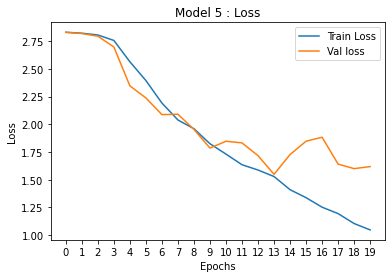

In [0]:
#plot the perfomance of model 5
dictionary5 = history5.history
train_loss = dictionary5['loss']
val_loss = dictionary5['val_loss']
train_accuracy = dictionary5['accuracy']
val_accuracy = dictionary5['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5 : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5 : Loss')
plt.legend()
plt.show()

In [0]:
#model 4a : model4 + data augmentation
trainDataGenerator =tf.keras.preprocessing.image.ImageDataGenerator(
shear_range=0.2,
zoom_range=0.2,
rotation_range=30,
horizontal_flip=True)

validationDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = trainDataGenerator.flow(trainX,trainY, batch_size=16)
validation_generator = validationDataGenerator.flow(testX, testY, batch_size = 16)

model4a = tf.keras.Sequential(name = "model4a")
inputShape = (height, width, depth)
model4a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model4a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model4a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model4a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model4a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4a.add(keras.layers.Flatten())
model4a.add(keras.layers.Dense(512,activation='relu'))
model4a.add(keras.layers.Dense(classes, activation='softmax'))
model4a.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model4a_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history4a = model4a.fit(train_generator,epochs=20, validation_data =validation_generator,steps_per_epoch= len(trainX)/16, validation_steps = len(testX)/16 ,callbacks = [checkpoint])



Epoch 1/20
64/63 [==============================] - ETA: 0s - loss: 2.8268 - accuracy: 0.0618
Epoch 00001: val_loss improved from inf to 2.81604, saving model to /content/gdrive/My Drive/Deep Learning Model/model4a_weights.01-2.82.hdf5
64/63 [==============================] - 4s 64ms/step - loss: 2.8268 - accuracy: 0.0618 - val_loss: 2.8160 - val_accuracy: 0.0618
Epoch 2/20
63/63 [============================>.] - ETA: 0s - loss: 2.8028 - accuracy: 0.0744
Epoch 00002: val_loss improved from 2.81604 to 2.77770, saving model to /content/gdrive/My Drive/Deep Learning Model/model4a_weights.02-2.78.hdf5
64/63 [==============================] - 4s 60ms/step - loss: 2.8028 - accuracy: 0.0745 - val_loss: 2.7777 - val_accuracy: 0.1529
Epoch 3/20
63/63 [============================>.] - ETA: 0s - loss: 2.7140 - accuracy: 0.1290
Epoch 00003: val_loss improved from 2.77770 to 2.56889, saving model to /content/gdrive/My Drive/Deep Learning Model/model4a_weights.03-2.57.hdf5
64/63 [=================

In [0]:
model4a = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model4a_weights.19-1.48.hdf5')
model4a.evaluate_generator(validation_generator, steps = len(testX)/16)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[1.4853863716125488, 0.4882352948188782]

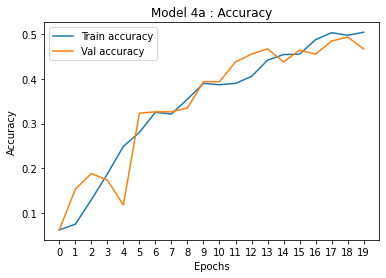

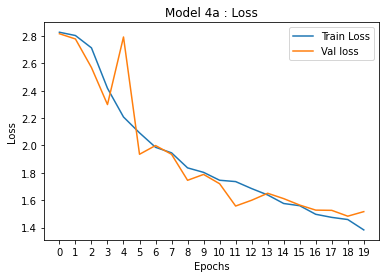

In [0]:
#plot the perfomance of model 4a
dictionary4a = history4a.history
train_loss = dictionary4a['loss']
val_loss = dictionary4a['val_loss']
train_accuracy = dictionary4a['accuracy']
val_accuracy = dictionary4a['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4a : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 4a : Loss')
plt.legend()
plt.show()

In [0]:
trainDataGenerator =tf.keras.preprocessing.image.ImageDataGenerator(
shear_range=0.2,
zoom_range=0.2,
rotation_range=30,
horizontal_flip=True)

validationDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = trainDataGenerator.flow(trainX,trainY, batch_size=16)
validation_generator = validationDataGenerator.flow(testX, testY, batch_size = 16)

#model5a
model5a = tf.keras.Sequential(name = "model5a")
inputShape = (height, width, depth)
model5a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model5a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5a.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5a.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5a.add(keras.layers.Flatten())
model5a.add(keras.layers.Dense(32,activation='relu'))
model5a.add(keras.layers.Dense(classes, activation='softmax'))
model5a.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model5a_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history5a = model5a.fit(train_generator,epochs=20, validation_data =validation_generator,steps_per_epoch= len(trainX)/16, validation_steps = len(testX)/16 ,callbacks = [checkpoint])


Epoch 1/20
63/63 [============================>.] - ETA: 0s - loss: 2.8352 - accuracy: 0.0556
Epoch 00001: val_loss improved from inf to 2.82944, saving model to /content/gdrive/My Drive/Deep Learning Model/model5a_weights.01-2.83.hdf5
64/63 [==============================] - 4s 62ms/step - loss: 2.8351 - accuracy: 0.0559 - val_loss: 2.8294 - val_accuracy: 0.0765
Epoch 2/20
63/63 [============================>.] - ETA: 0s - loss: 2.8287 - accuracy: 0.1052
Epoch 00002: val_loss improved from 2.82944 to 2.82641, saving model to /content/gdrive/My Drive/Deep Learning Model/model5a_weights.02-2.83.hdf5
64/63 [==============================] - 4s 61ms/step - loss: 2.8287 - accuracy: 0.1039 - val_loss: 2.8264 - val_accuracy: 0.0706
Epoch 3/20
63/63 [============================>.] - ETA: 0s - loss: 2.8239 - accuracy: 0.0883
Epoch 00003: val_loss improved from 2.82641 to 2.81995, saving model to /content/gdrive/My Drive/Deep Learning Model/model5a_weights.03-2.82.hdf5
64/63 [=================

In [0]:
model5a = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model5a_weights.18-1.65.hdf5')
model5a.evaluate_generator(validation_generator, steps = len(testX)/16)

[1.6333986520767212, 0.3970588147640228]

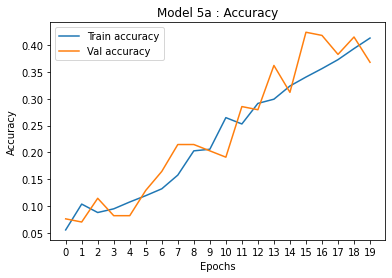

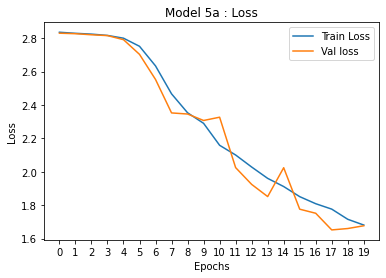

In [0]:
#plot the perfomance of model 5a
dictionary5a = history5a.history
train_loss = dictionary5a['loss']
val_loss = dictionary5a['val_loss']
train_accuracy = dictionary5a['accuracy']
val_accuracy = dictionary5a['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5a : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5a : Loss')
plt.legend()
plt.show()

In [0]:
#model5aa : model5a + additional augmentation techniques
trainDataGenerator =tf.keras.preprocessing.image.ImageDataGenerator(
shear_range=0.2,
zoom_range=0.2,
rotation_range=30,
horizontal_flip=True,
width_shift_range = 20.0,
height_shift_range = 20.0,
vertical_flip = True
)

validationDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()

train_generator = trainDataGenerator.flow(trainX,trainY, batch_size=16)
validation_generator = validationDataGenerator.flow(testX, testY, batch_size = 16)


model5aa = tf.keras.Sequential(name = "model5aa")
inputShape = (height, width, depth)
model5aa.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same", input_shape=inputShape, activation='relu'))
model5aa.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5aa.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5aa.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5aa.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5aa.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5aa.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5aa.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5aa.add(tf.keras.layers.Conv2D (64, (3, 3), padding="same",  activation='relu'))
model5aa.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5aa.add(keras.layers.Flatten())
model5aa.add(keras.layers.Dense(32,activation='relu'))
model5aa.add(keras.layers.Dense(classes, activation='softmax'))
model5aa.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])

fname = "/content/gdrive/My Drive/Deep Learning Model/model5aa_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(fname, monitor="val_loss",mode="min", save_best_only=True, verbose=1)

history5aa = model5aa.fit(train_generator,epochs=20, validation_data =validation_generator,steps_per_epoch= len(trainX)/16, validation_steps = len(testX)/16, callbacks = [checkpoint] )
model5aa.evaluate_generator(validation_generator, steps = len(testX)/16)

Epoch 1/20
63/63 [============================>.] - ETA: 0s - loss: 2.8319 - accuracy: 0.0575
Epoch 00001: val_loss improved from inf to 2.82509, saving model to /content/gdrive/My Drive/Deep Learning Model/model5aa_weights.01-2.83.hdf5
64/63 [==============================] - 5s 71ms/step - loss: 2.8318 - accuracy: 0.0569 - val_loss: 2.8251 - val_accuracy: 0.0588
Epoch 2/20
63/63 [============================>.] - ETA: 0s - loss: 2.8215 - accuracy: 0.0575
Epoch 00002: val_loss improved from 2.82509 to 2.81336, saving model to /content/gdrive/My Drive/Deep Learning Model/model5aa_weights.02-2.81.hdf5
64/63 [==============================] - 4s 68ms/step - loss: 2.8217 - accuracy: 0.0569 - val_loss: 2.8134 - val_accuracy: 0.0500
Epoch 3/20
63/63 [============================>.] - ETA: 0s - loss: 2.8054 - accuracy: 0.0526
Epoch 00003: val_loss improved from 2.81336 to 2.78620, saving model to /content/gdrive/My Drive/Deep Learning Model/model5aa_weights.03-2.79.hdf5
64/63 [==============

[2.01552152633667, 0.27941176295280457]

In [0]:
model5aa = tf.keras.models.load_model('/content/gdrive/My Drive/Deep Learning Model/model5aa_weights.18-1.90.hdf5')
model5aa.evaluate_generator(validation_generator, steps = len(testX)/16)

[1.95635986328125, 0.29411765933036804]

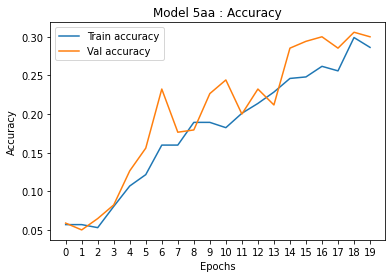

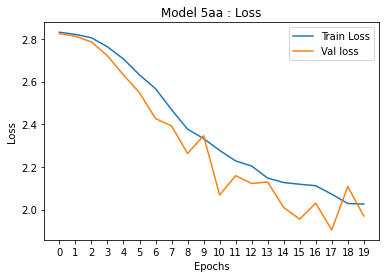

In [0]:
#plot the perfomance of model 5aa
dictionary5aa = history5aa.history
train_loss = dictionary5aa['loss']
val_loss = dictionary5aa['val_loss']
train_accuracy = dictionary5aa['accuracy']
val_accuracy = dictionary5aa['val_accuracy']

plt.plot(train_accuracy, label='Train accuracy')
plt.plot(val_accuracy, label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5aa : Accuracy')
plt.legend()
plt.show()


plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label = 'Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Model 5aa : Loss')
plt.legend()
plt.show()

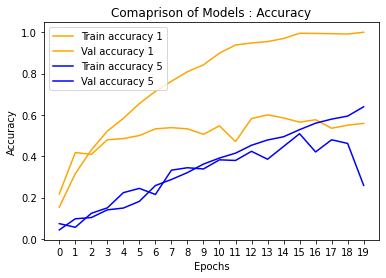

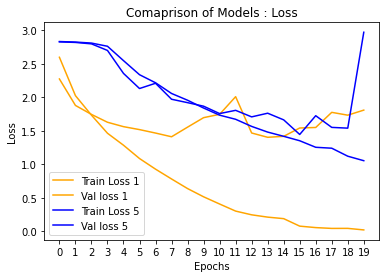

In [0]:
#comaprison of  accuracy and loss of model1 vs model5
train_loss_1 = dictionary1['loss']
val_loss_1 = dictionary1['val_loss']
train_accuracy_1 = dictionary1['accuracy']
val_accuracy_1 = dictionary1['val_accuracy']

train_loss_5 = dictionary5['loss']
val_loss_5 = dictionary5['val_loss']
train_accuracy_5 = dictionary5['accuracy']
val_accuracy_5 = dictionary5['val_accuracy']


plt.plot(train_accuracy_1, label='Train accuracy 1',color = 'orange')
plt.plot(val_accuracy_1, label = 'Val accuracy 1',color = 'orange')
plt.plot(train_accuracy_5, label='Train accuracy 5', color = 'blue')
plt.plot(val_accuracy_5, label = 'Val accuracy 5', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Accuracy')
plt.legend()
plt.show()



plt.plot(train_loss_1, label='Train Loss 1',color = 'orange')
plt.plot(val_loss_1, label = 'Val loss 1', color = 'orange')
plt.plot(train_loss_5, label='Train Loss 5',color = 'blue')
plt.plot(val_loss_5, label = 'Val loss 5',color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Loss')
plt.legend()
plt.show()

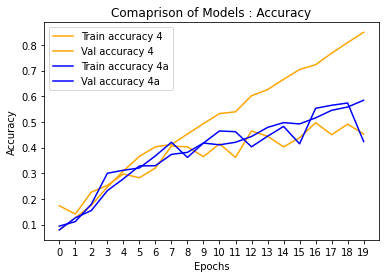

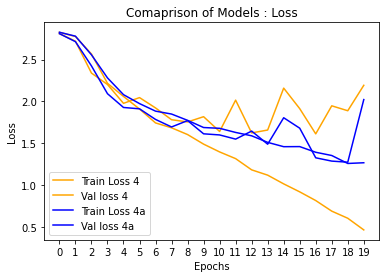

In [0]:
#comaprison of  accuracy and loss of model4 vs model4a
train_loss_4 = dictionary4['loss']
val_loss_4 = dictionary4['val_loss']
train_accuracy_4 = dictionary4['accuracy']
val_accuracy_4 = dictionary4['val_accuracy']

train_loss_4a = dictionary4a['loss']
val_loss_4a = dictionary4a['val_loss']
train_accuracy_4a = dictionary4a['accuracy']
val_accuracy_4a = dictionary4a['val_accuracy']


plt.plot(train_accuracy_4, label='Train accuracy 4',color = 'orange')
plt.plot(val_accuracy_4, label = 'Val accuracy 4',color = 'orange')
plt.plot(train_accuracy_4a, label='Train accuracy 4a', color = 'blue')
plt.plot(val_accuracy_4a, label = 'Val accuracy 4a', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Accuracy')
plt.legend()
plt.show()



plt.plot(train_loss_4, label='Train Loss 4',color = 'orange')
plt.plot(val_loss_4, label = 'Val loss 4', color = 'orange')
plt.plot(train_loss_4a, label='Train Loss 4a',color = 'blue')
plt.plot(val_loss_4a, label = 'Val loss 4a',color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Loss')
plt.legend()
plt.show()

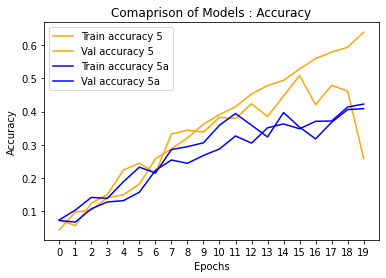

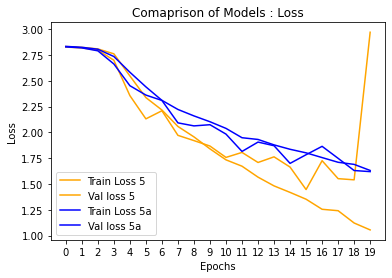

In [0]:
#comaprison of  accuracy and loss of model5 vs model5a
train_loss_5 = dictionary5['loss']
val_loss_5 = dictionary5['val_loss']
train_accuracy_5 = dictionary5['accuracy']
val_accuracy_5 = dictionary5['val_accuracy']

train_loss_5a = dictionary5a['loss']
val_loss_5a = dictionary5a['val_loss']
train_accuracy_5a = dictionary5a['accuracy']
val_accuracy_5a = dictionary5a['val_accuracy']


plt.plot(train_accuracy_5, label='Train accuracy 5',color = 'orange')
plt.plot(val_accuracy_5, label = 'Val accuracy 5',color = 'orange')
plt.plot(train_accuracy_5a, label='Train accuracy 5a', color = 'blue')
plt.plot(val_accuracy_5a, label = 'Val accuracy 5a', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Accuracy')
plt.legend()
plt.show()



plt.plot(train_loss_5, label='Train Loss 5',color = 'orange')
plt.plot(val_loss_5, label = 'Val loss 5', color = 'orange')
plt.plot(train_loss_5a, label='Train Loss 5a',color = 'blue')
plt.plot(val_loss_5a, label = 'Val loss 5a',color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Loss')
plt.legend()
plt.show()

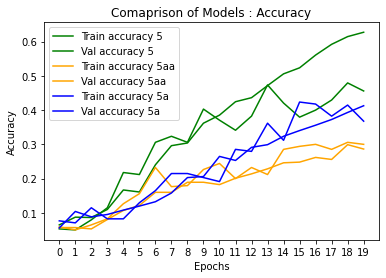

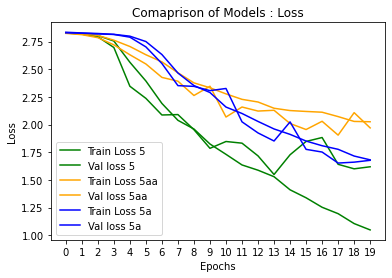

In [0]:
#comaprison of  accuracy and loss of model5 vs model5a vs model5aa
train_loss_5 = dictionary5['loss']
val_loss_5 = dictionary5['val_loss']
train_accuracy_5 = dictionary5['accuracy']
val_accuracy_5 = dictionary5['val_accuracy']

train_loss_5aa = dictionary5aa['loss']
val_loss_5aa = dictionary5aa['val_loss']
train_accuracy_5aa = dictionary5aa['accuracy']
val_accuracy_5aa = dictionary5aa['val_accuracy']

train_loss_5a = dictionary5a['loss']
val_loss_5a = dictionary5a['val_loss']
train_accuracy_5a = dictionary5a['accuracy']
val_accuracy_5a = dictionary5a['val_accuracy']


plt.plot(train_accuracy_5, label='Train accuracy 5',color = 'green')
plt.plot(val_accuracy_5, label = 'Val accuracy 5',color = 'green')
plt.plot(train_accuracy_5aa, label='Train accuracy 5aa',color = 'orange')
plt.plot(val_accuracy_5aa, label = 'Val accuracy 5aa',color = 'orange')
plt.plot(train_accuracy_5a, label='Train accuracy 5a', color = 'blue')
plt.plot(val_accuracy_5a, label = 'Val accuracy 5a', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Accuracy')
plt.legend()
plt.show()

plt.plot(train_loss_5, label='Train Loss 5',color = 'green')
plt.plot(val_loss_5, label = 'Val loss 5', color = 'green')
plt.plot(train_loss_5aa, label='Train Loss 5aa',color = 'orange')
plt.plot(val_loss_5aa, label = 'Val loss 5aa', color = 'orange')
plt.plot(train_loss_5a, label='Train Loss 5a',color = 'blue')
plt.plot(val_loss_5a, label = 'Val loss 5a',color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20),np.arange(20))
plt.title('Comaprison of Models : Loss')
plt.legend()
plt.show()

In [0]:
#ensemble model1 -  all the above 8 models
model1_predictions = model1.predict(testX)
model2_predictions = model2.predict(testX)
model3_predictions = model3.predict(testX)
model4_predictions = model4.predict(testX)
model5_predictions = model5.predict(testX)
model4a_predictions = model4a.predict(testX)
model5a_predictions = model5a.predict(testX)
model5aa_predictions = model5aa.predict(testX)

average = np.mean([model1_predictions,model2_predictions, model3_predictions, model4_predictions, model5_predictions, model4a_predictions, model5a_predictions, model5aa_predictions], axis = 0)
prediction = np.argmax(average, axis = 1)
print(accuracy_score(prediction, testY))

0.6088235294117647


In [0]:
#enselble model2 - models having val_loss <1.5
average = np.mean([model1_predictions,model2_predictions, model3_predictions, model4_predictions, model4a_predictions], axis = 0)
prediction = np.argmax(average, axis = 1)
print(accuracy_score(prediction, testY))

0.6176470588235294


In [0]:
#ensemble model3 - models having val acc >55%
average = np.mean([model2_predictions, model3_predictions], axis = 0)
prediction = np.argmax(average, axis = 1)
print(accuracy_score(prediction, testY))

0.5852941176470589


In [0]:
#another method to implement ensemble model1
inputs = tf.keras.layers.Input(shape= inputShape)
m1 = model1(inputs)
m2 = model2(inputs)
m3 = model3(inputs)
m4 = model4(inputs)
m5 = model5(inputs)
m4a = model4a(inputs)
m5a = model5a(inputs)
m5aa = model5aa(inputs)
outputs = tf.keras.layers.average([m1,m2,m3,m4,m5,m4a,m5a,m5aa])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.01),metrics=["accuracy"])
print(ensemble_model.evaluate(testX,testY))

11/11 [==============================] - 1s 59ms/step - loss: 1.2752 - accuracy: 0.6088
[1.275226354598999, 0.6088235378265381]
